# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_json = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | hualmay
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | poroshkovo
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | maniitsoq
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | berlevag
Processing Record 15 of Set 1 | porciuncula
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | sisimiut
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | nizhnyaya tura
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | breisach
Processi

Processing Record 36 of Set 4 | henties bay
Processing Record 37 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 4 | muros
Processing Record 39 of Set 4 | maxixe
Processing Record 40 of Set 4 | sokoni
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | yokadouma
Processing Record 43 of Set 4 | cacequi
Processing Record 44 of Set 4 | meulaboh
Processing Record 45 of Set 4 | khorixas
Processing Record 46 of Set 4 | norman wells
Processing Record 47 of Set 4 | puerto el triunfo
Processing Record 48 of Set 4 | asfi
Processing Record 49 of Set 4 | orsha
Processing Record 0 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 1 of Set 5 | tuckahoe
Processing Record 2 of Set 5 | pevek
Processing Record 3 of Set 5 | kahului
Processing Record 4 of Set 5 | ahuimanu
Processing Record 5 of Set 5 | port lincoln
Processing Record 6 of Set 5 | husavik
Processing Record 7 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 8 

Processing Record 24 of Set 8 | teya
Processing Record 25 of Set 8 | kudahuvadhoo
Processing Record 26 of Set 8 | harper
Processing Record 27 of Set 8 | lorengau
Processing Record 28 of Set 8 | pemangkat
Processing Record 29 of Set 8 | lasa
Processing Record 30 of Set 8 | uray
Processing Record 31 of Set 8 | daxian
City not found. Skipping...
Processing Record 32 of Set 8 | san quintin
Processing Record 33 of Set 8 | mareeba
Processing Record 34 of Set 8 | prince rupert
Processing Record 35 of Set 8 | khorinsk
Processing Record 36 of Set 8 | pecos
Processing Record 37 of Set 8 | ancud
Processing Record 38 of Set 8 | shkotovo-26
City not found. Skipping...
Processing Record 39 of Set 8 | nioki
Processing Record 40 of Set 8 | gusau
Processing Record 41 of Set 8 | castro alves
Processing Record 42 of Set 8 | shaoxing
Processing Record 43 of Set 8 | hofn
Processing Record 44 of Set 8 | coahuayana
Processing Record 45 of Set 8 | dong hoi
Processing Record 46 of Set 8 | cherskiy
Processing R

Processing Record 10 of Set 12 | ijaki
City not found. Skipping...
Processing Record 11 of Set 12 | dingle
Processing Record 12 of Set 12 | horsham
Processing Record 13 of Set 12 | salinas
Processing Record 14 of Set 12 | samarai
Processing Record 15 of Set 12 | ca mau
Processing Record 16 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 12 | vanavara
Processing Record 18 of Set 12 | capanema
Processing Record 19 of Set 12 | penalva
Processing Record 20 of Set 12 | bodden town
Processing Record 21 of Set 12 | mountain home
Processing Record 22 of Set 12 | ozgon
City not found. Skipping...
Processing Record 23 of Set 12 | isangel
Processing Record 24 of Set 12 | vao
Processing Record 25 of Set 12 | aklavik
Processing Record 26 of Set 12 | niederkruchten
Processing Record 27 of Set 12 | cervo
Processing Record 28 of Set 12 | nadvoitsy
Processing Record 29 of Set 12 | la tuque
Processing Record 30 of Set 12 | loukhi
Processing Record 31 of Set 12 | sambava


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint george,37.1041,-113.5841,19.41,35,0,6.69,US,1667868503
1,avarua,-21.2078,-159.7750,25.03,65,75,3.09,CK,1667868618
2,hobart,-42.8794,147.3294,25.03,57,0,5.66,AU,1667868324
3,hualmay,-11.0964,-77.6139,17.98,82,16,2.86,PE,1667868668
4,hermanus,-34.4187,19.2345,11.00,87,13,3.09,ZA,1667868555


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint george,37.1041,-113.5841,19.41,35,0,6.69,US,1667868503
1,avarua,-21.2078,-159.7750,25.03,65,75,3.09,CK,1667868618
2,hobart,-42.8794,147.3294,25.03,57,0,5.66,AU,1667868324
3,hualmay,-11.0964,-77.6139,17.98,82,16,2.86,PE,1667868668
4,hermanus,-34.4187,19.2345,11.00,87,13,3.09,ZA,1667868555


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

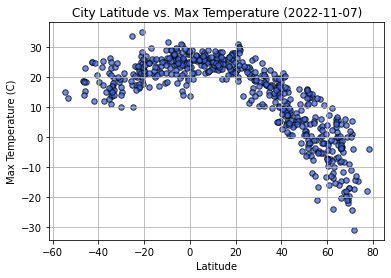

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="royalblue",
            edgecolors="black",s=30, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-11-07)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

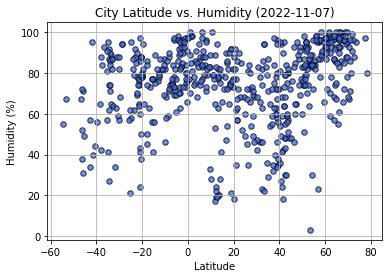

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="royalblue",
            edgecolors="black",s=30, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-11-07)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

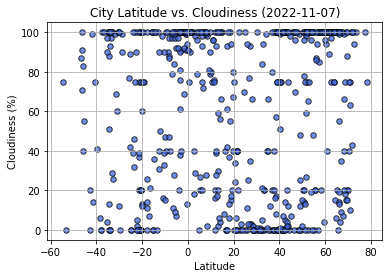

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="royalblue",
            edgecolors="black",s=30, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-11-07)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

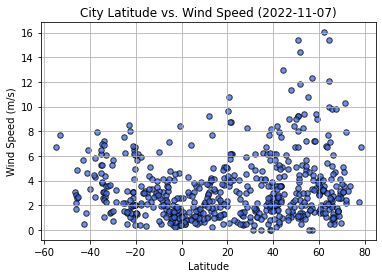

In [39]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="royalblue",
            edgecolors="black",s=30, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-11-07)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [75]:
# Define a function to create Linear Regression plots
def createlinreg(x_value, y_value, x_label, y_label):
    plt.scatter(x_value, y_value, marker="o", facecolors="royalblue",
            edgecolors="black",s=30, alpha=0.75)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regress_values = x_value * slope + intercept
    plt.plot(x_value, regress_values, "r-")
    plt.annotate(line_eq,(x_value.mean(), y_value.mean()), fontsize=15, color="red")
    print(f"The r-value is: {rvalue}")

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint george,37.1041,-113.5841,19.41,35,0,6.69,US,1667868503
5,poroshkovo,48.6683,22.7533,8.90,87,99,1.28,UA,1667868668
6,sitka,57.0531,-135.3300,2.94,23,0,0.00,US,1667868641
8,albany,42.6001,-73.9662,11.30,48,5,0.45,US,1667868195
10,maniitsoq,65.4167,-52.9000,-8.38,55,0,3.10,GL,1667868670


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,25.03,65,75,3.09,CK,1667868618
2,hobart,-42.8794,147.3294,25.03,57,0,5.66,AU,1667868324
3,hualmay,-11.0964,-77.6139,17.98,82,16,2.86,PE,1667868668
4,hermanus,-34.4187,19.2345,11.00,87,13,3.09,ZA,1667868555
7,lebu,-37.6167,-73.6500,12.09,84,100,4.27,CL,1667868468


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8752226898166806


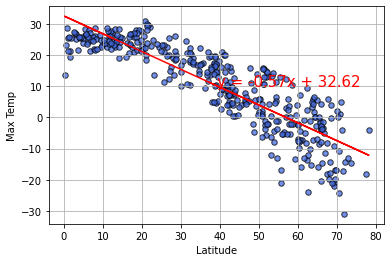

In [78]:
# Linear regression on Northern Hemisphere
createlinreg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")

The r-value is: 0.5354277151206918


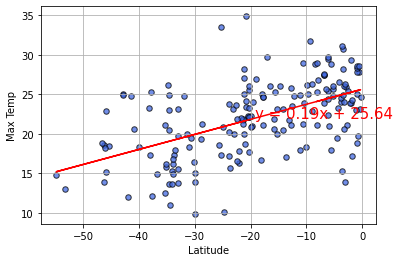

In [79]:
# Linear regression on Southern Hemisphere
createlinreg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")

**Discussion about the linear relationship:** Since the Earth is round in the northern hemisphere the latitudes that are further north (higher numbers) will be colder, with lower max temps. The latitudes that are closer to the equator (closer to zero) will be warmer, with larger max temps.

The same can be said for the southern hemisphere. The latitudes that are further south (lower negative numbers) will be colder, with lower max temps. The latitudes that are closer to the equator (closer to zero) will be warmer, with larger max temps. The r-value is not very large for the southern hemisphere implying there is little correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2627170196079131


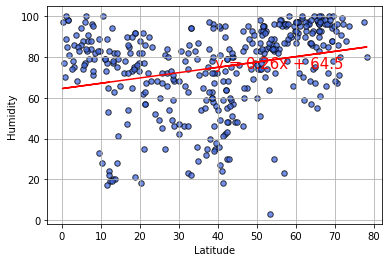

In [80]:
# Northern Hemisphere
createlinreg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

The r-value is: 0.35044981108190804


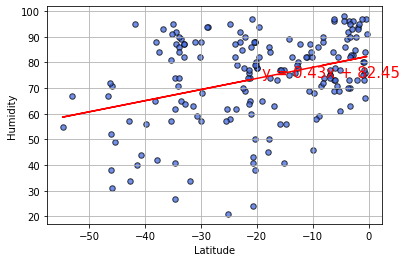

In [81]:
# Southern Hemisphere
createlinreg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** The r-value is very low for both the northern and southern hemispheres so there is little to no correlation between latitude and humidity this time of the year.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13766183530267248


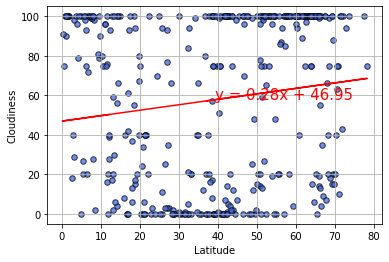

In [82]:
# Northern Hemisphere
createlinreg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

The r-value is: 0.21037660346923834


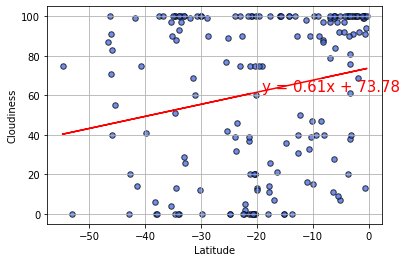

In [83]:
# Southern Hemisphere
createlinreg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** Even lower r-values for both the north hemisphere and southern hemisphere which implies there is no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2176099725628827


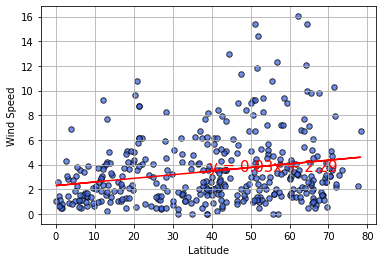

In [84]:
# Northern Hemisphere
createlinreg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

The r-value is: -0.36316043720084257


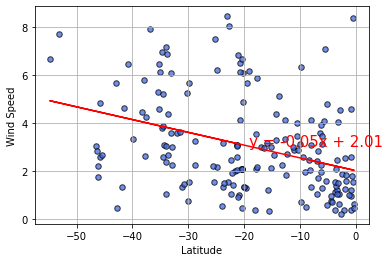

In [85]:
# Southern Hemisphere
createlinreg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** Again, the low r-value for both hemispheres implies there is no correlation between latitude and wind speed.